### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Stationary vortex

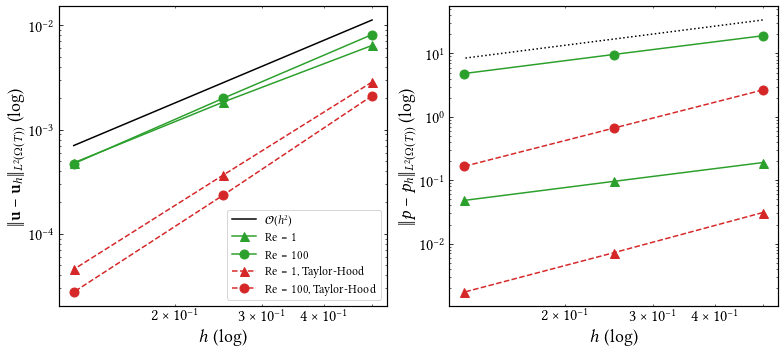

In [21]:
### nu = 1

# Re = 1

error_u_re1 = [0.006048432165414336, 0.001756829086108918, 0.0004696049465535104]
error_p_re1 = [0.1920056996711667, 0.09682646989778407, 0.04828879456640561]
div_error_re1 = [7.771561172376096e-16, 2.664535259100376e-15, 6.661338147750939e-15]

error_u_re100 = [0.6045040601291177, 0.1756426465625965, 0.04695882876659266]   # with non-zero rhs
error_p_re100 = [19.20708472264689, 9.682981260896653, 4.828888932873408]
div_error_re100 = [9.992007221626409e-16, 2.664535259100376e-15, 7.105427357601002e-15]


error_u_re1_th = [0.002860542808320891, 0.0003648531653440462, 4.566199784137853e-05]
error_p_re1_th = [0.03090994787410668, 0.007178945508482006, 0.001723805788554178]
div_error_re1_th = [0.0106690350754842, 0.002216291221034838, 0.0004955443741785359]

error_u_re100_th = [0.002860542808320891, 0.0003648531653440462, 4.566199784137853e-05]
error_p_re100_th = [41.76079725808144, 41.7447013410484, 41.74241059032556]
div_error_re100_th = [0.01020473005982991, 0.002167818713579683, 0.0004879415450251834]



# solving Re*(dt(u) + (u*nabla)u) - delta u + nabla p = 0
error_u_re1 = [0.00641520519543778, 0.001831942655682834, 0.0004800030864948174]
error_p_re1 = [0.1900926670517891, 0.09596564185190862, 0.0481436800338853]
div_error_re1 = [1.221245327087672e-15, 2.664535259100376e-15, 7.993605777301127e-15]

error_u_re100 = [0.1795909951103472, 0.06987225767189932, 0.02690461249154361]
error_p_re100 = [25.73806787694349, 17.20798888730964, 10.58131895416084]
div_error_re100 = [1.665334536937735e-15, 2.664535259100376e-15, 8.881784197001252e-15]

# scaling lambda_boundary with Re
error_u_re100 = [0.008155231550891477, 0.00199127553343261, 0.0004706966886948697]
error_p_re100 = [19.02099870174365, 9.639363451663991, 4.833565406461453]
div_error_re100 = [9.992007221626409e-16, 2.664535259100376e-15, 7.105427357601002e-15]

# Taylor-Hood P2 x P1

error_u_re1_th = [0.002860542808320902, 0.0003648531653443715, 4.566199784152156e-05]
error_p_re1_th = [0.03090994787411075, 0.007178945508484895, 0.001723805788557257]
div_error_re1_th = [0.01066903507548775, 0.002216291221048161, 0.0004955443741603283]

error_u_re100_th = [0.002109463332696311, 0.0002340324942987951, 2.764478605922631e-05]
error_p_re100_th = [2.656534899640811, 0.6638554534326472, 0.1660676148496427]
div_error_re100_th = [0.02361759820029707, 0.005153058785992926, 0.001168918513961614]




h = [0.5, 0.25, 0.125]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 4.5e-2*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   
ax1.loglog(h, error_u_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")

ax1.loglog(h, error_u_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u}_h\|_{L^2(\Omega(T))}$ (log)")
ax1.legend()

ax2.loglog(h, 6.75e1*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black")   
ax2.loglog(h, error_p_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, error_p_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")

ax2.loglog(h, error_p_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, error_p_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|p-p_h\|_{L^2(\Omega(T))}$ (log)")
#ax2.legend()

fig.tight_layout()
plt.show()
